# What Factors Made People More Likely to Survive on the Titanic

**Here's data description from Kaggle:** 

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. 

**VARIABLE DESCRIPTIONS:**


survival        Survival
                (0 = No; 1 = Yes)
                
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
                
name            Name

sex             Sex

age             Age

sibsp           Number of Siblings/Spouses Aboard

parch           Number of Parents/Children Aboard

ticket          Ticket Number

fare            Passenger Fare

cabin           Cabin

embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
                

**SPECIAL NOTES:**

Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

# Question:
What factors made people more likely to survive?

# Data Import
Let's import csv file into pandas dataframe and have a look at the dateframe.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
%pylab inline
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)#read csv into pandas dataframe
titanic_df.head() #have a brief look at the dataset

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


# Data Wrangling 
Let's check if the dateframe has some NaN in the value. 'Age''Cabin'and 'Embarked'have NaN.
About 20% 'Age'value are missing,Since we can't have supplementary on these values,they may have impact on the later statistic inference.
About 77% 'Cabin'value are missing, which's a major part .So we don't examine 'Cabin'later for the 'Cabin' values are not reliable.
About 0.2% 'Embarked'value are missing, which 's a slight part,we examine 'Embarked'values later.

In [2]:
print titanic_df.isnull().any(axis=0)
def nullpercentage(key):
    nullvalue=titanic_df[key]
    nullvalue=nullvalue[titanic_df.isnull()[key]]
    percentage=round(float(len(nullvalue))/len(titanic_df[key]),3)
    print '{} has null value percentage is {}'.format(key,percentage) 
    return None

nullpercentage('Age')
nullpercentage('Cabin')
nullpercentage('Embarked')

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
Age has null value percentage is 0.199
Cabin has null value percentage is 0.771
Embarked has null value percentage is 0.002


# Exploration:
When explore on the variables, I'd like to examine on the variables of 'Pclass','Sex','Age','Fare','Embarked','SibSp','Parch' and see if they have some relationship with 'Survived' .

**Statistic Inference of numerial variables 'Age','Fare','Parch','SibSp'** 

Firstly, we have a look at the statistic description of numerical variables

In [3]:
#statistic description of the numerial variables 'Age','Fare','Parch','SibSp' by group 'Survived'=0 or 1
titanic_df.groupby('Survived',as_index='False')[['Age','Fare','Parch','SibSp']].describe()

Age        Fare       Parch       SibSp
Survived                                                      
0        count  424.000000  549.000000  549.000000  549.000000
         mean    30.626179   22.117887    0.329690    0.553734
         std     14.172110   31.388207    0.823166    1.288399
         min      1.000000    0.000000    0.000000    0.000000
         25%     21.000000    7.854200    0.000000    0.000000
         50%     28.000000   10.500000    0.000000    0.000000
         75%     39.000000   26.000000    0.000000    1.000000
         max     74.000000  263.000000    6.000000    8.000000
1        count  290.000000  342.000000  342.000000  342.000000
         mean    28.343690   48.395408    0.464912    0.473684
         std     14.950952   66.596998    0.771712    0.708688
         min      0.420000    0.000000    0.000000    0.000000
         25%     19.000000   12.475000    0.000000    0.000000
         50%     28.000000   26.000000    0.000000    0.000000
         75%     36.000000   57.000000    1.000000    1.000000
         max     80.000000  512.329200    5.000000    4.000000

1.**'Age'**:Passengers survived has mean of 28.343690  is slightly younger than passengers not survived with mean of 30.626179,both median are 28.We have 'Age'distribution plot as below. 'Age' is not extremely skewed and we examine if it is a normal distribution.

[<matplotlib.text.Text at 0x9df4370>, <matplotlib.text.Text at 0x9e10b70>]

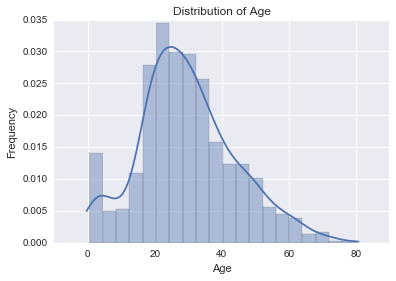

In [4]:

sns.distplot(titanic_df.Age[titanic_df.Age.notnull()], kde = True).set(ylabel = 'Frequency', title = 'Distribution of Age')#Age distribution plot

Let's perform the Shapiro-Wilk test for normality check.The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.We see p value less than any reasonable significance level , so we reject null hypothesis ,'Age'is not normal distribution.

In [5]:
from scipy.stats import shapiro
shapiro(titanic_df.Age.dropna())

(0.9814577102661133, 7.33733145352744e-08)

Since Age is not normal distribution,we can't use t test.Insteadly,we use Mann-Whitney U-test,which is a nonparametric statistical test of 2 independent samples that does not assume a normal distribution.
Use only when the number of observation in each sample is > 20 and we have 2 independent samples of ranks.
The null hypothesis is average Age of survived and unsurvived passengers are the same.

In [6]:
print 'Survived Age samples count={}'.format(len(titanic_df[titanic_df.Survived == 1]['Age'].dropna()))
print 'UnSurvived Age samples count={}'.format(len(titanic_df[titanic_df.Survived == 0]['Age'].dropna()))
from scipy.stats import mannwhitneyu
mannwhitneyu(titanic_df[titanic_df.Survived == 1]['Age'].dropna(), titanic_df[titanic_df.Survived == 0]['Age'].dropna())

Survived Age samples count=290
UnSurvived Age samples count=424


MannwhitneyuResult(statistic=57682.0, pvalue=0.080246262388688816)

The reported p-value is for a one-sided hypothesis, to get the two-sided p-value multiply the returned p-value by 2. The p value=0.16 is greater than any reasonable significance level.
We can't reject the null.**So we don't have sufficient evidence to say that the 'Age'average of survived passengers and unsurvived passengers are not the same. **

2.**'Fare'**:We have 'Fare' distribution plot,which is extremely skewed.So we cant use T-test for 'Fare'.

[<matplotlib.text.Text at 0xbbd7ed0>, <matplotlib.text.Text at 0xbbd7950>]

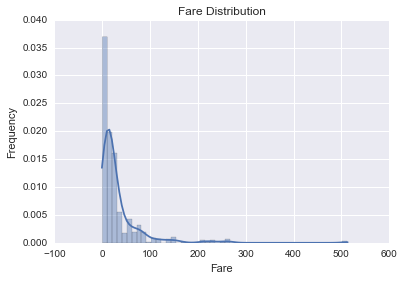

In [25]:
sns.distplot(titanic_df.Fare[titanic_df.Fare.notnull()], kde = True).set(ylabel = 'Frequency', title = 'Fare Distribution')
#Fare distribution plot

We see a barplot of Fare of survived=1 and survived=0. Passengers survived has mean of 48.395408 and median of 26 is much higher then passengers not survived with mean of 22.117887 and median of 10.5.We have IQR of survived is 57.000000-12.475000=44.525 and IQR of unsurvived is 26.000000-7.854200=18.146.It seems that passenger with higher fare were more likely to survived.

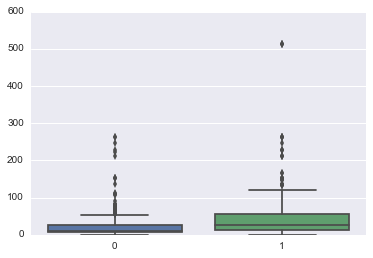

In [26]:
def testsample(variable): #function for create test samples
    survived=[]
    nonsurvived=[]
    for i in range(len(titanic_df[variable])):
        if titanic_df.iloc[i]['Survived']==0:
            survived.append(titanic_df.iloc[i][variable])
        elif titanic_df.iloc[i]['Survived']==1:
            nonsurvived.append(titanic_df.iloc[i][variable])

    survived_array=np.array(survived)
    survived_array=survived_array[~np.isnan(survived_array)] #omit nan, using x = x[~np.isnan(x)]

    nonsurvived_array=np.array(nonsurvived)
    nonsurvived_array=nonsurvived_array[~np.isnan(nonsurvived_array)]#omit nan, using x = x[~np.isnan(x)]
    return survived_array,nonsurvived_array

sample=testsample('Fare')
sns.boxplot(data=sample)

We use Mann-Whitney U-test,which is a nonparametric statistical test of 2 independent samples that does not assume a normal distribution. 
Use only when the number of observation in each sample is > 20 and we have 2 independent samples of ranks.
The hypothesis is the average Fare of survived and unsurvived passengers are the same.
The reported p-value is for a one-sided hypothesis. The p value is less than any reasonable significance level.So we reject null hypothesis.
**Passenger with higher fare were more likely to survived.**

In [27]:
print 'Survived Fare samples count={}'.format(len(titanic_df[titanic_df.Survived == 1]['Fare'].dropna()))
print 'UnSurvived Fare samples count={}'.format(len(titanic_df[titanic_df.Survived == 0]['Fare'].dropna()))
from scipy.stats import mannwhitneyu
mannwhitneyu(titanic_df[titanic_df.Survived == 1]['Fare'].dropna(), titanic_df[titanic_df.Survived == 0]['Fare'].dropna())

Survived Fare samples count=342
UnSurvived Fare samples count=549


MannwhitneyuResult(statistic=57806.5, pvalue=2.2767385896251186e-22)

3.**'Parch'**:We have 'Parch' distribution plot,which is extremely skewed.So we cant use T-test for 'Parch'.

[<matplotlib.text.Text at 0x9eda7f0>, <matplotlib.text.Text at 0x9ef4c10>]

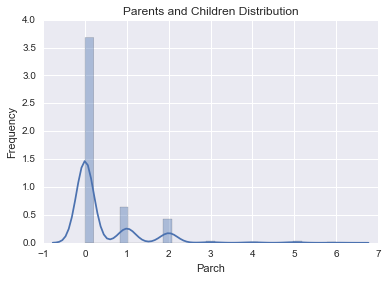

In [6]:
sns.distplot(titanic_df.Parch[titanic_df.Parch.notnull()], kde = True).set(ylabel = 'Frequency', title = 'Parents and Children Distribution')

We found that Parch has value of 0,1,2,3,4,5,6. Most cases are 0.Let's find out how many cases in the dataset when parch=1 or >=2. And we group the data into one group when parch>=2,and add a new variable 'Parchnew' of the grouping.

In [11]:
print titanic_df['Parch'].unique()
print 'the cases with Parch=0 is',len(titanic_df[titanic_df['Parch']==0])
print 'the cases with Parch=1 is',len(titanic_df[titanic_df['Parch']==1])
print 'the cases with Parch>=2 is',len(titanic_df[titanic_df['Parch']>=2])
titanic_df['Parchnew'] = 0
condition1 = titanic_df['Parch'] >= 2
condition2=titanic_df['Parch'] ==1
titanic_df.loc[condition1, 'Parchnew'] =2
titanic_df.loc[condition2, 'Parchnew'] =1
print 'the cases of parch=0 is{},the cases of parch=1 is{},the cases of parch>=2 is{}'.format(len(titanic_df[titanic_df['Parchnew']==0]),len(titanic_df[titanic_df['Parchnew']==1]),len(titanic_df[titanic_df['Parchnew']==2]))

[0 1 2 5 3 4 6]
the cases with Parch=0 is 678
the cases with Parch=1 is 118
the cases with Parch>=2 is 95
the cases of parch=0 is678,the cases of parch=1 is118,the cases of parch>=2 is95


We draw a clustered bar plot to see the relationship between Parent/children counts and survived result.**We see passengers had 
parents/children aboard were more likely to survived than passengers without parents/children aboard.**

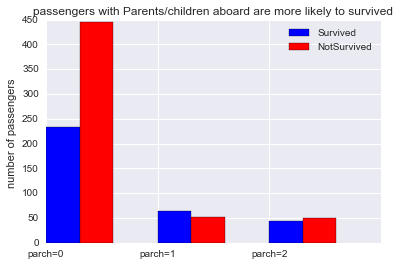

In [9]:
Survived_group_Parchnew=titanic_df.groupby(['Survived','Parchnew'])
#print Survived_group_parch.groups[:]
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 3
numpassengersurvived = [len(Survived_group_Parchnew.groups[1L, 0L]),len(Survived_group_Parchnew.groups[1L,1L]),len(Survived_group_Parchnew.groups[1L,2L])]

numpassengernotsurvived = [len(Survived_group_Parchnew.groups[0L, 0L]),len(Survived_group_Parchnew.groups[0L,1L]),len(Survived_group_Parchnew.groups[0L,2L])]

## necessary variables
ind = np.arange(0,N)                # the x locations for the groups
width = 0.3                   # the width of the bars

## the bars
rects1 = ax.bar(ind, numpassengersurvived, width,
                color='blue',
               )
rects2 = ax.bar(ind+width, numpassengernotsurvived, width,
                    color='red',
                    )

#the lables and tick marks
ax.set_ylabel('number of passengers ')
ax.set_title('passengers with Parents/children aboard are more likely to survived')
xTickMarks = ['parch=0','parch=1','parch=2']
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Survived', 'NotSurvived') )


4.**'SibSp'**:We have 'SibSp' distribution plot,which is extremely skewed.So we cant use T-test for 'SibSp'.

[<matplotlib.text.Text at 0xa093e10>, <matplotlib.text.Text at 0xa093f10>]

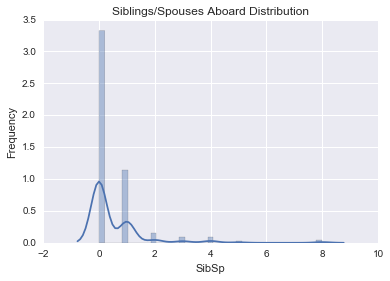

In [10]:
sns.distplot(titanic_df.SibSp[titanic_df.SibSp.notnull()], kde = True).set(ylabel = 'Frequency', title = 'Siblings/Spouses Aboard Distribution')


We found that SibSp has value of 0,1,2,3,4,5,8. Most cases are 0 and 1.We group the data into one group when parch>=2. And add a new variable 'Sibspnew' for grouping.

In [16]:
print titanic_df['SibSp'].unique()
print 'the cases with SibSp=0 is',len(titanic_df[titanic_df['SibSp']==0])
print 'the cases with SibSp=1 is',len(titanic_df[titanic_df['SibSp']==1])
print 'the cases with SibSp=2 is',len(titanic_df[titanic_df['SibSp']==2])
print 'the cases with SibSp=3 is',len(titanic_df[titanic_df['SibSp']==3])
print 'the cases with SibSp=4 is',len(titanic_df[titanic_df['SibSp']==4])
print 'the cases with SibSp=5 is',len(titanic_df[titanic_df['SibSp']==5])
print 'the cases with SibSp=8 is',len(titanic_df[titanic_df['SibSp']==8])
titanic_df['Sibspnew'] = 0
condition1 = titanic_df['SibSp'] >= 2
condition2=titanic_df['SibSp'] ==1
titanic_df.loc[condition1, 'Sibspnew'] =2
titanic_df.loc[condition2, 'Sibspnew'] =1
print 'the cases of sibsp=0 is{},the cases of sibsp=1 is{},the cases of sibsp>=2 is{}'.format(len(titanic_df[titanic_df['Sibspnew']==0]),len(titanic_df[titanic_df['Sibspnew']==1]),len(titanic_df[titanic_df['Sibspnew']==2]))

[1 0 3 4 2 5 8]
the cases with SibSp=0 is 608
the cases with SibSp=1 is 209
the cases with SibSp=2 is 28
the cases with SibSp=3 is 16
the cases with SibSp=4 is 18
the cases with SibSp=5 is 5
the cases with SibSp=8 is 7
the cases of sibsp=0 is608,the cases of sibsp=1 is209,the cases of sibsp>=2 is74


We draw a clustered bar plot to see the relationship between Siblings/Spouses Aboard counts and survived result.When Siblings/Spouses=1 
it seems that very likely to survived. When Siblings/Spouses>=2 or =0, more  Siblings and  no Siblings seem to lower the opportunity of survived.

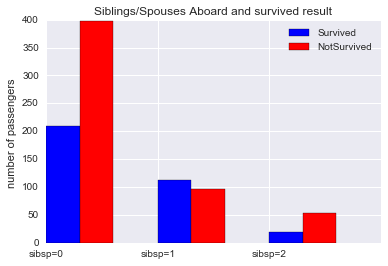

In [17]:
Survived_group_Sibspnew=titanic_df.groupby(['Survived','Sibspnew'])

fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 3
numpassengersurvived = [len(Survived_group_Sibspnew.groups[1L, 0L]),len(Survived_group_Sibspnew.groups[1L,1L]),len(Survived_group_Sibspnew.groups[1L,2L])]

numpassengernotsurvived = [len(Survived_group_Sibspnew.groups[0L, 0L]),len(Survived_group_Sibspnew.groups[0L,1L]),len(Survived_group_Sibspnew.groups[0L,2L])]

## necessary variables
ind = np.arange(0,N)                # the x locations for the groups
width = 0.3                   # the width of the bars

## the bars
rects1 = ax.bar(ind, numpassengersurvived, width,
                color='blue',
               )
rects2 = ax.bar(ind+width, numpassengernotsurvived, width,
                    color='red',
                    )

#the lables and tick marks
ax.set_ylabel('number of passengers ')
ax.set_title('Siblings/Spouses Aboard and survived result')
xTickMarks = ['sibsp=0','sibsp=1','sibsp=2']
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Survived', 'NotSurvived') )


Does the Siblings/Spouses related to survived result? We'll do chisquare  test on it.We have E>5 of each category.The null hypothesis is that the categorical data has the given frequencies(By default the categories are assumed to be equally likely).We see the p value is less than any reasonable significant level, **so we reject the null hypothesis and we say the Siblings/Spouses have impact on survived result.When Siblings/Spouses=1 the passengers were very likely to survived. When Siblings/Spouses>=2 or =0, passengers have much lower opportunity to survive.**

In [18]:
from scipy.stats import chisquare
chisquare([len(titanic_df[titanic_df['Sibspnew']==0]), len(titanic_df[titanic_df['Sibspnew']==1]), len(titanic_df[titanic_df['Sibspnew']==2])])

Power_divergenceResult(statistic=519.17171717171721, pvalue=1.8335553980946512e-113)

**categotical variable 'Sex','Pclass','Embarked' Exploration**

4.**'Sex'**: I grouped by 'Survived'and 'Sex', made a barplot and found:**female were more likely to survived than male..**

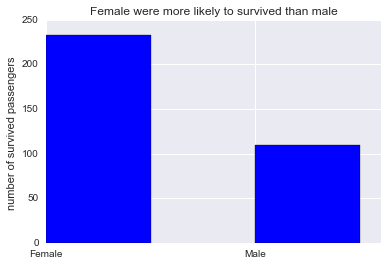

In [19]:
Survived_group_sex=titanic_df.groupby(['Survived','Sex'])
#print Survived_group.groups[1L, 'female']
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 2
numpassenger = [len(Survived_group_sex.groups[1L, 'female']),len(Survived_group_sex.groups[1L, 'male'])]


## necessary variables
ind = np.arange(0,N)                # the x locations for the groups
width = 0.5                   # the width of the bars

## the bars
rects1 = ax.bar(ind, numpassenger, width,
                color='blue',
               )
#the lables and tick marks
ax.set_ylabel('number of survived passengers ')
ax.set_title('Female were more likely to survived than male')
xTickMarks = ['Female','Male']
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)



5.**'Embarked'**:I grouped by 'Survived'and 'Embarked', made a barplot and found: **Passengers embarked on Southampton were most likely to survived than other stations.**

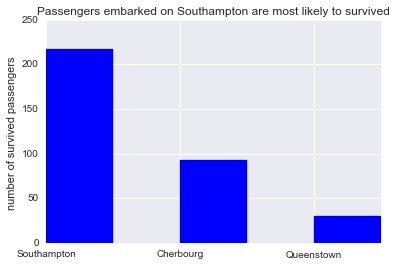

In [20]:
Survived_group_embark=titanic_df.groupby(['Survived','Embarked'])
#print Survived_group_embark.groups[1L, 'S']
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 3
numpassenger = [len(Survived_group_embark.groups[1L, 'S']),len(Survived_group_embark.groups[1L, 'C']),len(Survived_group_embark.groups[1L, 'Q'])]


## necessary variables
ind = np.arange(0,N)                # the x locations for the groups
width = 0.5                   # the width of the bars

## the bars
rects1 = ax.bar(ind, numpassenger, width,
                color='blue',
               )
#the lables and tick marks
ax.set_ylabel('number of survived passengers ')
ax.set_title('Passengers embarked on Southampton are most likely to survived')
xTickMarks = ['Southampton','Cherbourg','Queenstown']
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)

6.**'Pclass'**:I grouped by 'Survived'and 'Pclass', made a barplot and found:** Passengers of class 1 were most likely to survived than other class.**

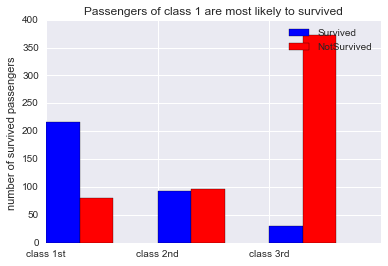

In [21]:
Survived_group_pclass=titanic_df.groupby(['Survived','Pclass'])
#print Survived_group_pclass.groups
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 3
numpassengersurvived = [len(Survived_group_pclass.groups[1L, 1L]),len(Survived_group_pclass.groups[1L,2L]),len(Survived_group_pclass.groups[1L,3L])]

numpassengernotsurvived = [len(Survived_group_pclass.groups[0L, 1L]),len(Survived_group_pclass.groups[0L,2L]),len(Survived_group_pclass.groups[0L,3L])]

## necessary variables
ind = np.arange(0,N)                # the x locations for the groups
width = 0.3                   # the width of the bars

## the bars
rects1 = ax.bar(ind, numpassenger, width,
                color='blue',
               )
rects2 = ax.bar(ind+width, numpassengernotsurvived, width,
                    color='red',
                    )

#the lables and tick marks
ax.set_ylabel('number of survived passengers ')
ax.set_title('Passengers of class 1 are most likely to survived')
xTickMarks = ['class 1st','class 2nd','class 3rd']
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Survived', 'NotSurvived') )


We found that passengers who paid higher fares and passengers in higher classes both suggested higher likelihoods of survival. 
It seems like these features are inherently correlated.We drew a boxplot and ** found the relationship of Fare and Pclass are high correlated.**

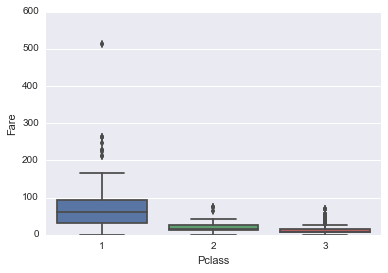

In [24]:
sns.boxplot(x="Pclass", y="Fare", data=titanic_df)

# Conclutions:
From exploration above,we can draw some conclutions:

1.We don't have sufficient evidence to say that the 'Age'average of survived passengers and unsurvived passengers are not the same.

2.Passengers with higher fare were more likely to survived. 

3.Passengers had parents and children aboard were more likely to survived.However.When Siblings/Spouses=1 the passengers were very likely to survived. When Siblings/Spouses>=2 or =0, passengers have much lower opportunity to survive.

4.Female were more likely to survived than male.

5.Passengers embarked on Southampton were most likely to survived than other station.

6.Passengers of class 1st were most likely to survived than other class.'Pclass' is high related with 'Fare'.

Remind that about 20% 'Age'value are missing,we can't have supplementary on these values,they may have impact on the later statistic inference.
